In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
from PIL.ImageOps import crop, flip, mirror
import os
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
import pickle
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

2024-01-29 22:50:06.251313: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
RANDOM_STATE = 42

In [3]:
def create_data():
    images = []
    final = []
    label = []
    name = ['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']
    for dis in name:
        folder_path = 'Corn Images/' + dis
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            img = Image.open(img_path)
            images.append(img)
            label.append(dis)
    final.append(images)
    final.append(label)
    return final

In [4]:
result = create_data()
dataset = pd.DataFrame({'Images': result[0], 'Label': result[1]})

In [5]:
print(dataset[dataset['Label'] == 'Blight'].count())
print(dataset[dataset['Label'] == 'Common_Rust'].count())
print(dataset[dataset['Label'] == 'Gray_Leaf_Spot'].count())
print(dataset[dataset['Label'] == 'Healthy'].count())

Images    1146
Label     1146
dtype: int64
Images    1306
Label     1306
dtype: int64
Images    574
Label     574
dtype: int64
Images    1162
Label     1162
dtype: int64


In [6]:
dataset[:100]

,Images,Label
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Blight
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Blight
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Blight
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Blight
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Blight
...,...,...
95,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Blight
96,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Blight
97,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Blight
98,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Blight


In [7]:
def show_image(image):
    image = image.copy()
    plt.imshow(image, aspect='equal')

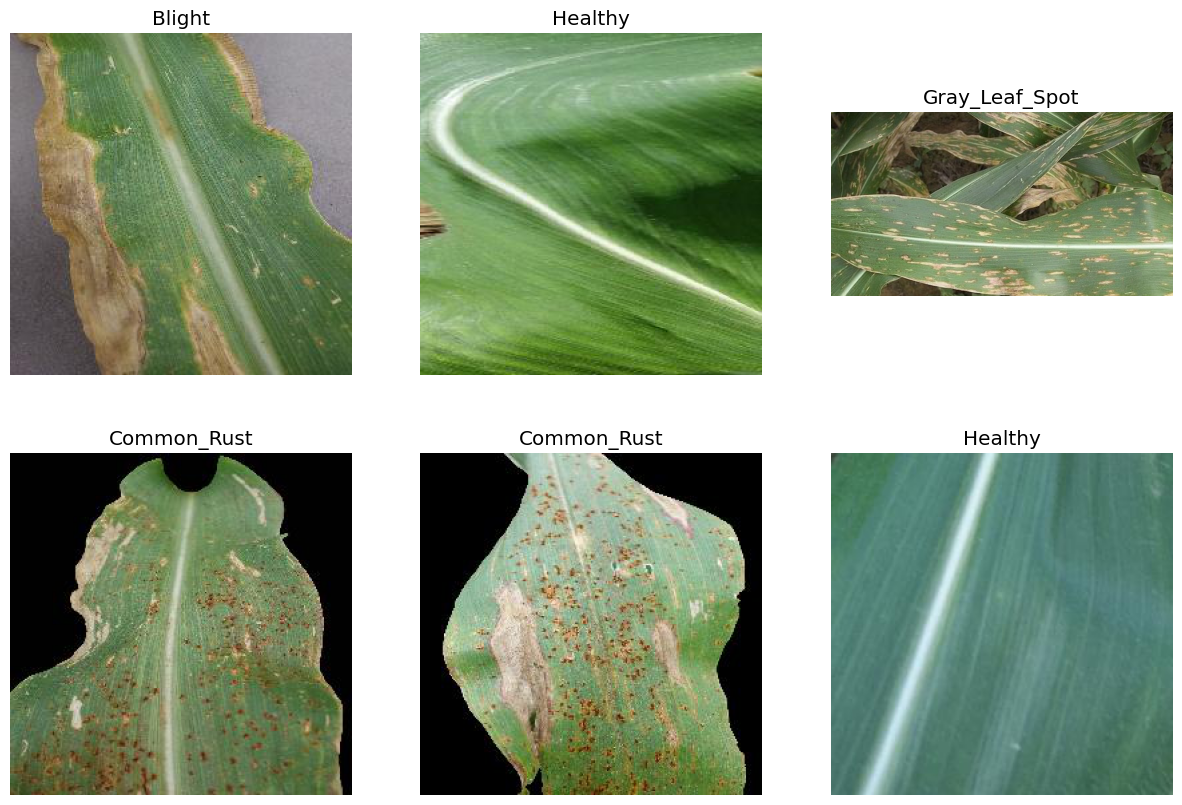

In [8]:
rng = np.random.default_rng(RANDOM_STATE)
n_cols = 3
n_rows = 2
indexes = rng.choice(len(dataset), n_cols * n_rows)

plt.figure(figsize=(15, 10))

for ii, id in enumerate(indexes, 1):
    plt.subplot(n_rows, n_cols, ii)
    image = dataset['Images'][int(id)]
    show_image(image)
    plt.title(dataset['Label'][int(id)])
    plt.axis('off')

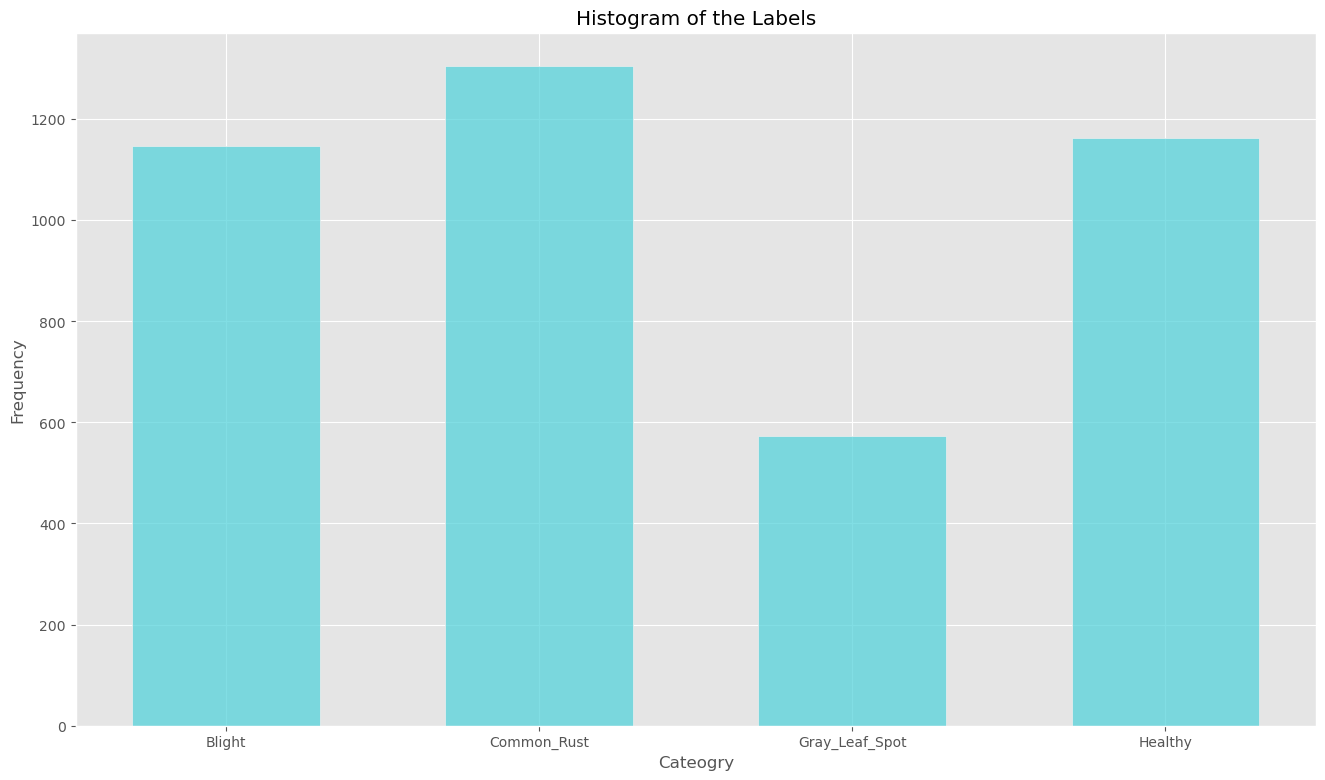

In [9]:
palette = sns.color_palette('hls', 4)

plt.figure(figsize=(16, 9))
sns.histplot(dataset['Label'], bins=4, shrink=0.6, kde=False, color=palette[2])

plt.xlabel('Cateogry')
plt.ylabel('Frequency')
plt.title('Histogram of the Labels')

# Show the plot
plt.show()

In [10]:
x = dataset[['Images', 'Label']]

In [11]:
x

,Images,Label
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Blight
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Blight
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Blight
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Blight
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Blight
...,...,...
4183,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Healthy
4184,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Healthy
4185,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Healthy
4186,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Healthy


In [51]:
X_train, X_test, y_train, y_test = train_test_split(x['Images'], x['Label'], test_size=0.2, random_state=RANDOM_STATE, shuffle=True, stratify=x['Label'])

In [52]:
def Resize(content):
    return content.resize((224, 224))

In [53]:
def RandomRotation(content):
    p = 0.2
    if np.random.random() < p:
        return content.rotate(np.random.randint(-45, 45))
    else:
        return content

In [54]:
def RandomHorizontalFlip(content):
    p = 0.2
    if np.random.random() < p:
        return mirror(content)
    else:
        return content

In [55]:
def RandomVerticalFlip(content):
    p = 0.2
    if np.random.random() < p:
        return flip(content)
    else:
        return content

In [56]:
def RandomZoom(content):
    p = 0.2
    if np.random.random() < p:
        cropped = crop(content, np.random.randint(0, 50))
        return cropped.resize((224, 224))
    else:
        return content

In [57]:
def AdjustContrast(content):
    p = 0.2
    if np.random.random() < p:
        return ImageEnhance.Contrast(content).enhance(np.random.uniform(0.5, 1.5))
    else:
        return content

In [58]:
def AdjustBrightness(content):
    p = 0.2
    if np.random.random() < p:
        return ImageEnhance.Brightness(content).enhance(np.random.uniform(0.5, 1.5))
    else:
        return content

In [59]:
def DataAugmentation(content):
    content = RandomRotation(content)
    content = RandomHorizontalFlip(content)
    content = RandomVerticalFlip(content)
    content = RandomZoom(content)
    content = AdjustContrast(content)
    content = AdjustBrightness(content)
    return content

In [60]:
X_train = X_train.apply(Resize)
X_test = X_test.apply(Resize)

In [61]:
X_train = X_train.apply(DataAugmentation)

In [62]:
X_train.head()

3531    <PIL.Image.Image image mode=RGB size=224x224 a...
1766    <PIL.Image.Image image mode=RGB size=224x224 a...
1578    <PIL.Image.Image image mode=RGB size=224x224 a...
3323    <PIL.Image.Image image mode=RGB size=224x224 a...
2578    <PIL.Image.Image image mode=RGB size=224x224 a...
Name: Images, dtype: object

In [63]:
"""n_rows = 2  
n_cols = 3
start_index = 0

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 9))

for i in range(n_cols):
    ax = axes[0, start_index + i]
    ax.imshow(X_train[i])
    ax = axes[1, start_index + i]
    ax.imshow(x[i])  # TODO

plt.show()    """

'n_rows = 2  \nn_cols = 3\nstart_index = 0\n\nfig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 9))\n\nfor i in range(n_cols):\n    ax = axes[0, start_index + i]\n    ax.imshow(X_train[i])\n    ax = axes[1, start_index + i]\n    ax.imshow(x[i])  # TODO\n\nplt.show()    '

In [64]:
def ToNumpy(content):
    return np.asarray(content, dtype=np.float32)

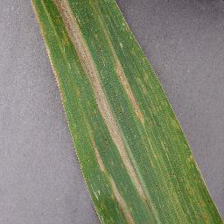

In [65]:
X_train[0]

In [66]:
X_train = X_train.apply(ToNumpy)
X_test = X_test.apply(ToNumpy)

In [67]:
def Rescaling(content):
    return content / 255.0

In [68]:
X_train = X_train.apply(Rescaling)
X_test = X_test.apply(Rescaling)

In [69]:
X_train.head()

3531    [[[0.39215687, 0.53333336, 0.38431373], [0.380...
1766    [[[0.007843138, 0.0, 0.0], [0.011764706, 0.003...
1578    [[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...
3323    [[[0.38431373, 0.53333336, 0.24313726], [0.380...
2578    [[[0.40392157, 0.43137255, 0.25882354], [0.388...
Name: Images, dtype: object

In [70]:
X_train = X_train.values
X_test = X_test.values
y_test = y_test.values
y_train = y_train.values

In [71]:
import pickle
import sklearn
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import Input

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model

In [72]:
X_train.shape

(3350,)

In [73]:
XX = X_train

In [74]:
for i in range(len(XX)):
    im = XX[i]
    if im.shape != (224, 224, 3):
        print("Errore, index =", i)
        print("Shape:", im.shape)

Errore, index = 719
Shape: (224, 224, 4)
Errore, index = 1548
Shape: (224, 224, 4)
Errore, index = 1929
Shape: (224, 224, 4)


In [75]:
y_train = np.delete(y_train, [719, 1548, 1929])

In [76]:
y_train.shape

(3347,)

In [77]:
XXX = []
for i in range(len(XX)):
    im = XX[i]
    if im.shape == (224, 224, 3):
        XXX.append(im)
print("Finale lenght:", len(XXX))

Finale lenght: 3347


In [78]:
XXX = np.array(XXX)

In [79]:
XXX.shape

(3347, 224, 224, 3)

In [80]:
enc = OneHotEncoder()

Y_train = enc.fit_transform(y_train[:, np.newaxis]).toarray()
Y_test = enc.transform(y_test[:, np.newaxis]).toarray()

In [81]:
input_shape = (224, 224, 3)

In [82]:
classifier = Sequential()

classifier.add(Input(shape=input_shape))

classifier.add(Conv2D(16, (3, 3), input_shape=input_shape, activation='relu', kernel_initializer='random_normal', strides=(1, 1)))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(32, (3, 3), input_shape=input_shape, activation='relu', kernel_initializer='random_normal', strides=(1, 1)))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(64, (3, 3), input_shape=input_shape, activation='relu', kernel_initializer='random_normal', strides=(1, 1)))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(128, (3, 3), input_shape=input_shape, activation='relu', kernel_initializer='random_normal', strides=(1, 1)))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Dropout(0.5))

classifier.add(Flatten())

classifier.add(Dense(units=4, activation='softmax', kernel_initializer='random_normal'))


classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [83]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 64)      

In [84]:
history = classifier.fit(XXX, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
105/105 [==============================] - 31s 281ms/step - loss: 0.8483 - accuracy: 0.6391
Epoch 2/10
105/105 [==============================] - 28s 269ms/step - loss: 0.5408 - accuracy: 0.7861
Epoch 3/10
105/105 [==============================] - 28s 268ms/step - loss: 0.4417 - accuracy: 0.8118
Epoch 4/10
105/105 [==============================] - 28s 269ms/step - loss: 0.3994 - accuracy: 0.8378
Epoch 5/10
105/105 [==============================] - 28s 268ms/step - loss: 0.3435 - accuracy: 0.8530
Epoch 6/10
105/105 [==============================] - 28s 267ms/step - loss: 0.3265 - accuracy: 0.8599
Epoch 7/10
105/105 [==============================] - 28s 267ms/step - loss: 0.2942 - accuracy: 0.8778
Epoch 8/10
105/105 [==============================] - 28s 267ms/step - loss: 0.2888 - accuracy: 0.8841
Epoch 9/10
105/105 [==============================] - 28s 267ms/step - loss: 0.2466 - accuracy: 0.9026
Epoch 10/10
105/105 [==============================] - 28s 267ms/step - l